(visualization:matplotlib:plots-3d)=
# 3D Plots

Matplotlib comes without native support for 3-dimensional plots. But there is an extension ('toolkit') for 3D plots: [Mplot3d](https://matplotlib.org/stable/api/toolkits/mplot3d.html). This toolkit is part of the Matplotlib standard installation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as plt3d

## Basics

For 3d plotting we need an [`Axes3D`](https://matplotlib.org/stable/api/toolkits/mplot3d/axes3d.html) object. This can either be created explicitly by `plt3d.axes3d.Axes3D(fig)` or implicitly by choosing `projection='3d'` in `Figure.add_axes` and similar functions. Automatic creation is preferred in newer versions of Mplot3d.

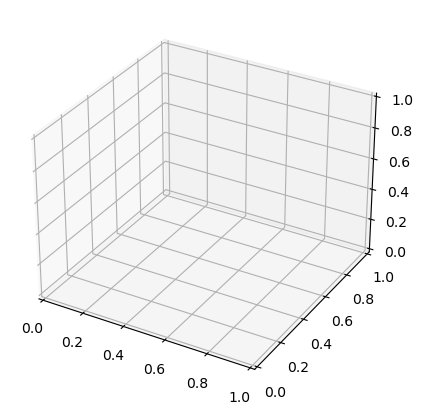

Type of ax: <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


In [2]:
fig = plt.figure()
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8), projection='3d')
plt.show()

print('Type of ax: ' + str(type(ax)))

Now `ax` is of type `Axes3D` instead of `Axes`.

Plotting is very similar to 2d plots. Here is a 3d line plot:

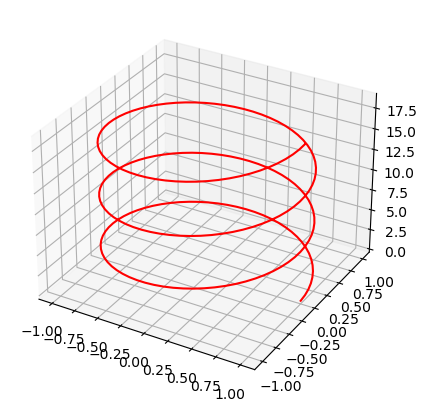

In [3]:
fig = plt.figure()
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8), projection='3d')

t = np.linspace(0, 6 * np.pi, 200)
x = np.cos(t)
y = np.sin(t)
z = t

ax.plot(x, y, z, '-r')
plt.show()

Mplot3d uses the Matplotlib API to draw its 3d plots. All arguments not processed by Mplot3d are passed on to Matplotlib. Thus, many properties like line style and color can be set in exactly the same way as in Matplotlib.

`Axes3D` objects can be configured in the same way as `Axes` objects. Functions `set_xlim`, `set_ylim`, `set_zlim`, `set_title` and axis labeling work as expected.

Several plot types are available. Some of them provide additional features in their 3d variant. For example, [`scatter`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.scatter.html) has a boolean argument `depthshade`, which by default is `True` and modifies the scatter points' color to give an appearance of depth. If color encodes an important feature, set `depthshade=False`.

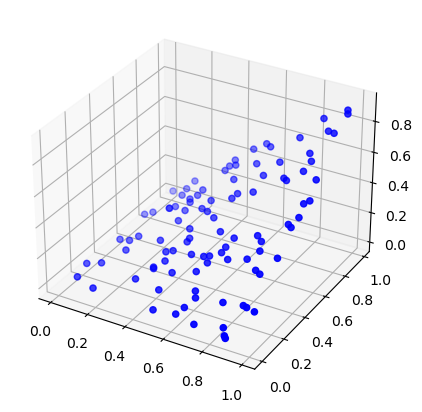

In [4]:
fig = plt.figure()
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8), projection='3d')

x = np.random.rand(100)
y = np.random.rand(100)
z = x * y

ax.scatter(x, y, z, c='blue')
plt.show()

## Camera Configuration

Initial position of the view can be set with `azim` and `elev` arguments when creating the `Axes3D` object. Simply pass them to `Figure.add_axes` or similar functions. The `proj_type` arguments switches between perspective (default) and orthogonal projection.

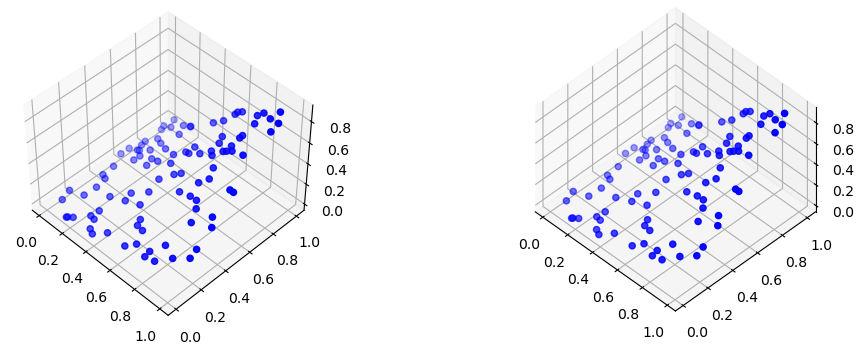

In [5]:
x = np.random.rand(100)
y = np.random.rand(100)
z = x * y

fig = plt.figure(figsize=(12, 4))
ax_left = fig.add_subplot(1, 2, 1, projection='3d', elev=45, azim=-45)
ax_right = fig.add_subplot(1, 2, 2, projection='3d', elev=45, azim=-45, proj_type='ortho')

ax_left.scatter(x, y, z, c='blue')
ax_right.scatter(x, y, z, c='blue')

plt.show()

When plotting in a simple Python shell, Mplot3d/Matplotlib create a figure window which allows for rotating the plot by mouse. To get this feature in a Jupyter notebook add the IPython magic `%matplotlib widget`, which requires installation of the [`ipympl` Python module](https://github.com/matplotlib/ipympl).

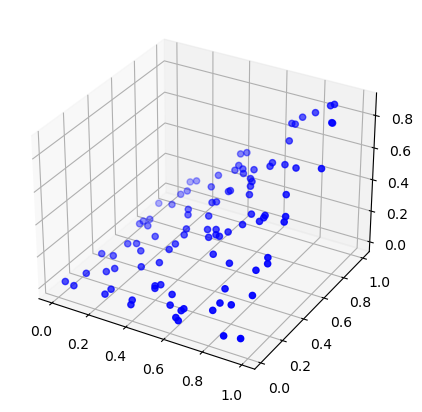

In [6]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8), projection='3d')

x = np.random.rand(100)
y = np.random.rand(100)
z = x * y

ax.scatter(x, y, z, c='blue')
plt.show()

## Limitations

Mplot3d is a very good choice for simple 3d plots. But more complex visualizations may contain rendering errors, because Mplot3d builds upon Matplotlib's 2d plotting facilities not allowing for correct overlap calculations.

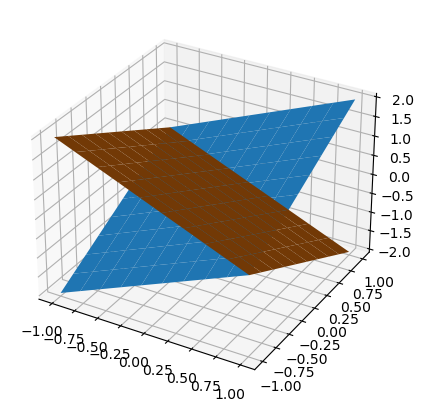

In [7]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8), projection='3d')

X, Y = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
Z1 = X + Y
Z2 = -X - Y

ax.plot_surface(X, Y, Z1)
ax.plot_surface(X, Y, Z2)

plt.show()